# PYBER ANALYSIS
* The volume of ride sharing appears to be more prevalent in Urban locations, more so than Suburban or Rural areas. 

* With that said, those who ride share in Rural areas are paying more per ride on average than those in Urban areas. This is likely due to availability (lack of drivers) and the distance a user may need to travel in Rural parts of a country.

* Also, from a supply and demand standpoint, drivers are more likely to work in Urban areas than they are Suburban or Rural ones.
---

In [1]:
%matplotlib inline

#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#files to load
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

#read city and ride data
city_data_df = pd.read_csv(city_data_to_load)
# print(city_data_df)

ride_data_df = pd.read_csv(ride_data_to_load)
# print(ride_data_df)

#merge data into a single dataset
city_and_ride_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])

#display the data table for preview
city_and_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#group by city
city_group = city_and_ride_df.set_index("city").groupby(["city"])
# city_group.head()

#calculate avgerage fare per city
avg_fare = city_group["fare"].mean()
# avg_fare.head()

per_city_fare = city_group["fare"].sum()
# per_city_fare.head()


In [3]:
#calculate total number of rides per city
per_city_rides = city_group["ride_id"].count()
# per_city_rides.head()


In [4]:
#calculate total number of drivers per city
per_city_drivers = city_data_df.set_index("city")["driver_count"]
# per_city_drivers.head()


In [5]:
#group by city type
city_type_group = city_data_df.set_index("city")["type"]
# city_type_group.head()


## Bubble Plot of Ride Sharing Data

In [6]:
#create ride sharing df
ride_sharing_df = pd.DataFrame({
    "Location Type": city_type_group,
    "Total Fare": per_city_fare,
    "Average Fare": avg_fare,
    "Total Rides": per_city_rides,
    "Total Drivers": per_city_drivers  
})
ride_sharing_df


,Location Type,Total Fare,Average Fare,Total Rides,Total Drivers
Amandaburgh,Urban,443.55,24.641667,18,12
Barajasview,Urban,557.31,25.332273,22,26
Barronchester,Suburban,582.76,36.422500,16,11
Bethanyland,Suburban,593.21,32.956111,18,22
Bradshawfurt,Rural,400.64,40.064000,10,7
Brandonfort,Suburban,673.31,35.437368,19,10
Carriemouth,Urban,764.49,28.314444,27,52
Christopherfurt,Urban,661.55,24.501852,27,41
Colemanland,Suburban,679.68,30.894545,22,23
Davidfurt,Suburban,543.93,31.995882,17,23


In [7]:
#create dataframe for each city type
urban_df = ride_sharing_df[ride_sharing_df["Location Type"] == "Urban"]
#urban_df

suburban_df = ride_sharing_df[ride_sharing_df["Location Type"] == "Suburban"]
#suburban_df

rural_df = ride_sharing_df[ride_sharing_df["Location Type"] == "Rural"]
#rural_df


In [8]:
#define x, y, and area for each city type
x_urban = np.array(urban_df["Total Rides"])
y_urban = np.array(urban_df["Average Fare"])
area_urban = np.array(urban_df["Total Drivers"])

x_suburban = np.array(suburban_df["Total Rides"])
y_suburban = np.array(suburban_df["Average Fare"])
area_suburban = np.array(suburban_df["Total Drivers"])

x_rural = np.array(rural_df["Total Rides"])
y_rural = np.array(rural_df["Average Fare"])
area_rural = np.array(rural_df["Total Drivers"])


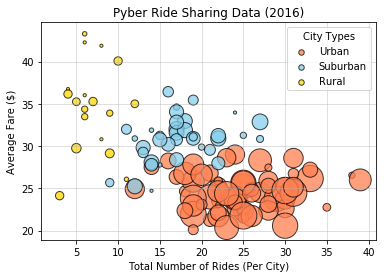

In [13]:
#build scatter plots for each city type
plt.scatter(x_urban, y_urban, marker="o", facecolor="coral", edgecolors="black", s=area_urban*10, alpha=0.75, label="Urban")
plt.scatter(x_suburban, y_suburban, marker="o", facecolor="skyblue", edgecolors="black", s=area_suburban*10, alpha=0.75, label="Suburban")
plt.scatter(x_rural, y_rural, marker="o", facecolor="gold", edgecolors="black", s=area_rural*10, alpha=0.75, label="Rural")

#label graph
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(alpha = 0.5)

#build legend
legend = plt.legend(title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#show plot
plt.savefig("pyber_ride_sharing_data.png")
plt.show()


## Total Fares by City Type

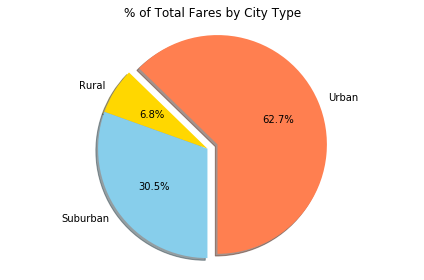

In [10]:
#Calculate Type Percents

total_fares = city_and_ride_df["fare"].sum()
#print(total_fares)

total_urban_fares = urban_df["Total Fare"].sum()
#print(total_urban_fares)
pct_total_urban = total_urban_fares/total_fares*100
#print(pct_total_urban)

total_suburban_fares = suburban_df["Total Fare"].sum()
#print(total_suburban_fares)
pct_total_suburban = total_suburban_fares/total_fares*100
#print(pct_total_suburban)

total_rural_fares = rural_df["Total Fare"].sum()
#print(total_rural_fares)
pct_total_rural = total_rural_fares/total_fares*100
#print(pct_total_rural)


#Build Pie Chart
loc_type = ["Urban", "Rural", "Suburban"]
#loc_type = city_and_ride_df["type"].unique()
loc_pct = [pct_total_urban, pct_total_rural, pct_total_suburban]

colors = ["coral", "gold","skyblue"]
explode = (0.1, 0, 0)

plt.pie(loc_pct, explode=explode, labels=loc_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.tight_layout()

plt.savefig("total_fare_by_city_type.png")
plt.show()


## Total Rides by City Type

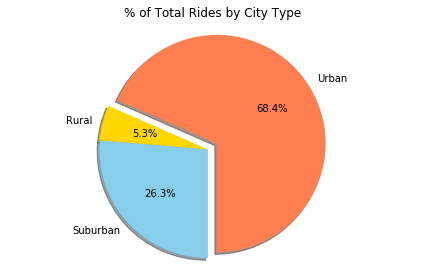

In [11]:
#Calculate Type Percents

total_rides = city_and_ride_df["ride_id"].count()
#print(total_rides)

total_urban_rides = urban_df["Total Rides"].sum()
#print(total_urban_rides)
pct_total_urban_rides = total_urban_rides/total_rides*100
#print(pct_total_urban_rides)

total_suburban_rides = suburban_df["Total Rides"].sum()
#print(total_suburban_rides)
pct_total_suburban_rides = total_suburban_rides/total_rides*100
#print(pct_total_suburban_rides)

total_rural_rides = rural_df["Total Rides"].sum()
#print(total_rural_rides)
pct_total_rural_rides = total_rural_rides/total_rides*100
#print(pct_total_rural_rides)


#Build Pie Chart
loc_type = ["Urban", "Rural", "Suburban"]
#loc_type = city_and_ride_df["type"].unique()
loc_pct = [pct_total_urban_rides, pct_total_rural_rides, pct_total_suburban_rides]

colors = ["coral", "gold","skyblue"]
explode = (0.1, 0, 0)

plt.pie(loc_pct, explode=explode, labels=loc_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.tight_layout()

plt.savefig("total_rides_by_city_type.png")
plt.show()


## Total Drivers by City Type

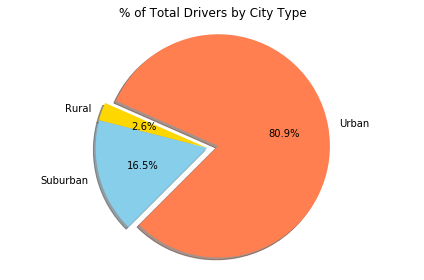

In [12]:
#Calculate Type Percents

total_drivers = ride_sharing_df["Total Drivers"].sum()
#print(total_drivers)

total_urban_drivers = urban_df["Total Drivers"].sum()
#print(total_urban_drivers)
pct_total_urban_drivers = total_urban_drivers/total_drivers*100
#print(pct_total_urban_drivers)

total_suburban_drivers = suburban_df["Total Drivers"].sum()
#print(total_suburban_drivers)
pct_total_suburban_drivers = total_suburban_drivers/total_drivers*100
#print(pct_total_suburban_drivers)

total_rural_drivers = rural_df["Total Drivers"].sum()
#print(total_rural_drivers)
pct_total_rural_drivers = total_rural_drivers/total_drivers*100
#print(pct_total_rural_drivers)


#Build Pie Chart
loc_type = ["Urban", "Rural", "Suburban"]
#loc_type = city_and_ride_df["type"].unique()
loc_pct = [pct_total_urban_drivers, pct_total_rural_drivers, pct_total_suburban_drivers]

colors = ["coral", "gold","skyblue"]
explode = (0.1, 0, 0)

plt.pie(loc_pct, explode=explode, labels=loc_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=225)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.tight_layout()

plt.savefig("total_drivers_by_city_type.png")
plt.show()
